In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/architect-ai2023/titanic/main/titanik.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Выведем общую информацию о DataFrame


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Определим количество пустых ячеек

In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Заполняем отсутствующие данные колонки 'Age' ('Возраст') средним значением (mean)

In [5]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)


# Удалим пустые ячейки колонок 'Cabin' ('Номер каюты') и 'Embarked' ('Порт посадки')

In [6]:
df = df.dropna(subset=['Cabin', 'Embarked'])


# Проверяем отсутсвие пустых значений в датасете
# 'Age' - заменены средним значением
# 'Cabin' и 'Embarked' - удалены

In [7]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Произведем группировку возраста по интервалам 10 лет

In [8]:
def age_group(age):
    return int(age // 10) * 10


# Создадим новый столбец 'AgeGroup', в котором будут содержаться интервалы возраста

In [9]:
df['AgeGroup'] = df['Age'].apply(age_group)


# Рассмотрим сводную статистическую информацию о DataFrame

In [10]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.112392,0.445545,0.440594,76.103301,29.900990
std,249.704228,0.473732,0.528205,14.988475,0.630490,0.732294,74.759941,15.581278
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375,20.000000
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000,30.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050,40.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,80.000000


# Создаем новый столбец "Age_Group" с возрастом в интервалах 10 лет

In [11]:
df['Age_Group'] = pd.cut(df['Age'], bins=range(0, 100, 10), right=False)


# Группируем данные по возрастной группе и вычисляем количество выживших и умерших

In [12]:
survival_by_age_group = df.groupby(['Age_Group', 'Survived']).size().unstack()


# Рисуем столбчатую диаграмму
# Настройки графика
# Отображаем график

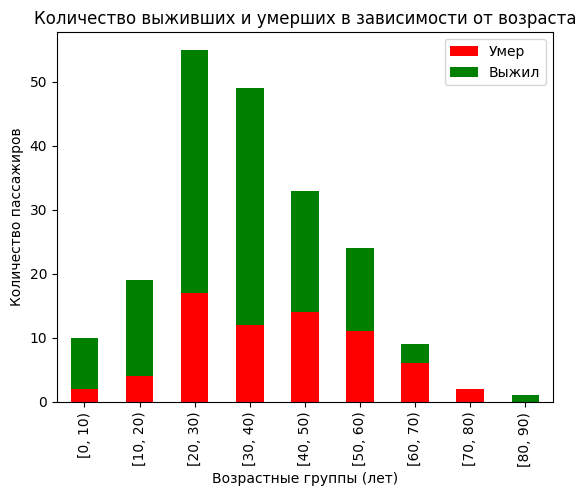

In [15]:
survival_by_age_group.plot(kind='bar', stacked=True, color=['red', 'green'])

plt.title('Количество выживших и умерших в зависимости от возраста')
plt.xlabel('Возрастные группы (лет)')
plt.ylabel('Количество пассажиров')
plt.legend(['Умер', 'Выжил'])

plt.show()


In [16]:
# Создаем столбчатую диаграмму для анализа влияния признака на выживание
def plot_survival_rate(feature):

    # Создаем сводную таблицу для анализа влияния признака на "Выживание"
    pivot_table = df.pivot_table(index=feature, values='Survived', aggfunc='mean')

    # Создаем цветовую палитру для столбцов
    colors = plt.cm.coolwarm(pivot_table['Survived'])

    # Создаем столбчатую диаграмму для визуализации
    plt.figure(figsize=(8, 6))
    plt.bar(pivot_table.index, pivot_table['Survived'] * 100, color=colors)
    plt.xlabel(feature)
    plt.ylabel('Процент выживших')
    plt.title(f'Влияние {feature} на выживание')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.show()


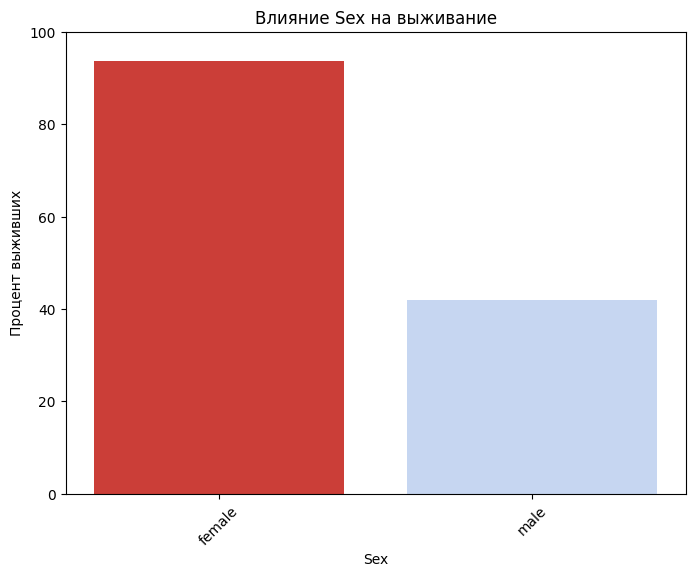

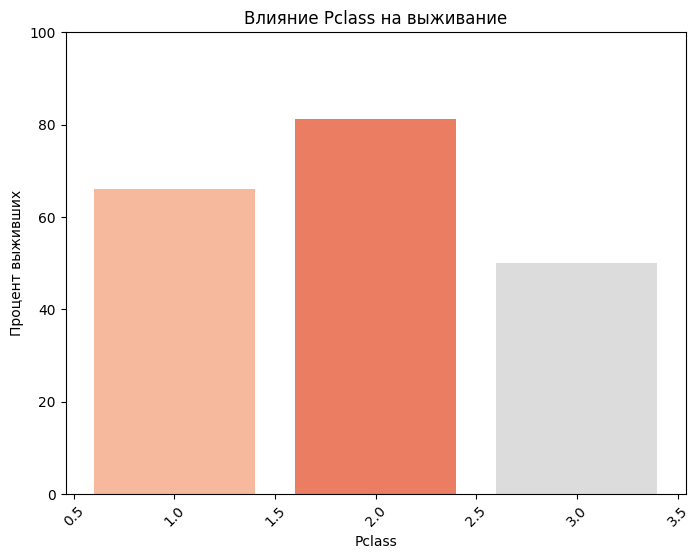

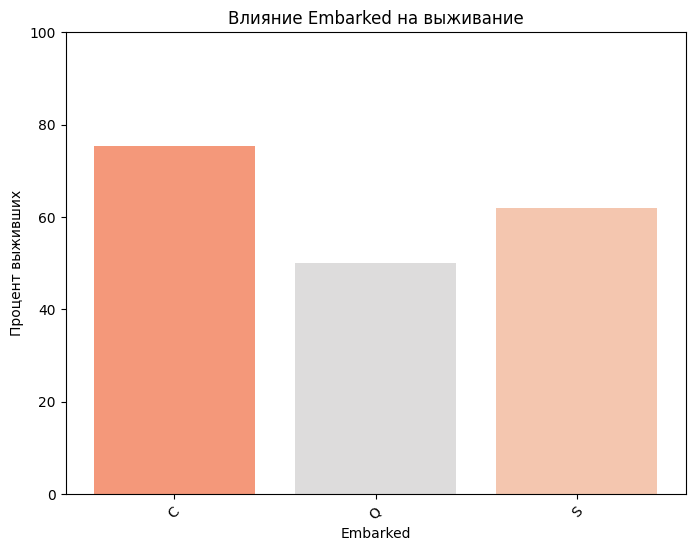

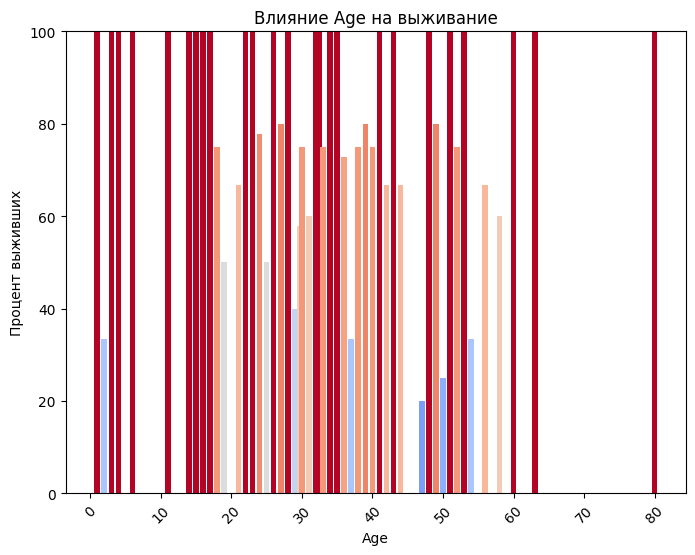

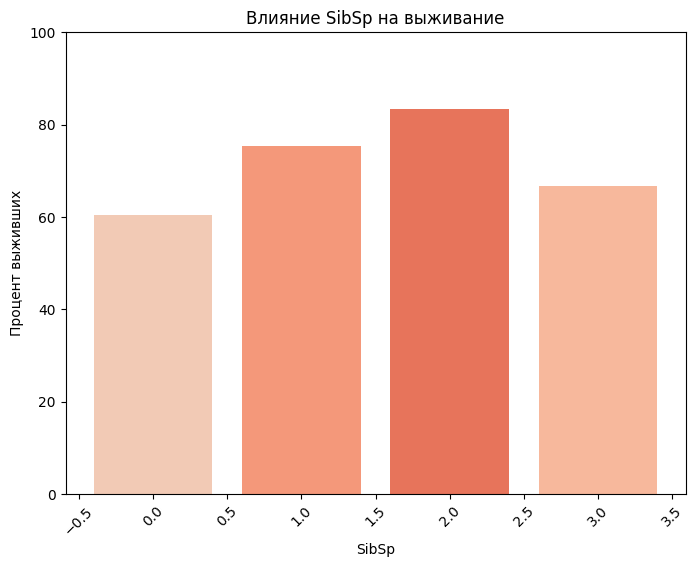

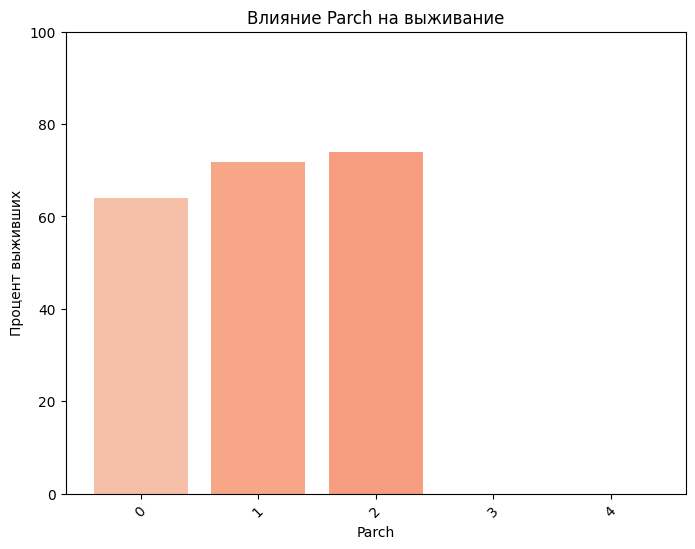

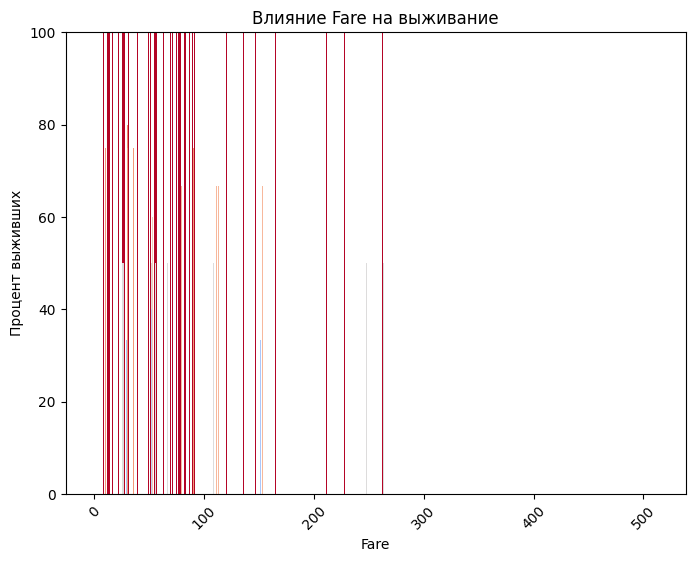

In [17]:
# Анализ и визуализация влияния различных признаков на выживаемость
plot_survival_rate('Sex')  # Пол
plot_survival_rate('Pclass')  # Класс каюты
plot_survival_rate('Embarked')  # Порт посадки
plot_survival_rate('Age')
plot_survival_rate('SibSp')
plot_survival_rate('Parch')
plot_survival_rate('Fare')
